# K-Nearest Neighbor Lab





In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install ipdb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Estimated coefficients:
b_0 = 1.223448275862069     
b_1 = -0.7862068965517242


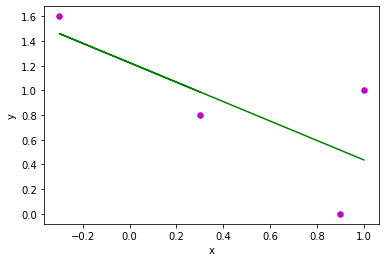

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	# x = np.array([.3,-.3,.9,1])
	# y = np.array([.8,1.6,0,1])

  x = np.array([.3,-.3,.9,1])
  y = np.array([.8,1.6,0,1])

	# estimating coefficients
  b = estimate_coef(x, y)
  print("Estimated coefficients:\nb_0 = {} \
    \nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
  plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


## 1. (40%) Correctly implement the k-nearest neighbor (KNN) algorithm and the KNN regression algorithm

### Code requirements
- Use Euclidean distance to decide closest neighbors. 
- Include optional distance weighting for both algorithms


In [5]:
# import ipdb; 
class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, Type='classification', columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type
        self.Type = Type

    def fit(self, X, y, k=3):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.X = X # 2D numpy array
        self.y = y # 1D numpy array
        self.k = k # int

        return self
    
    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        predictions = []
        for i in range(X.shape[0]):
          inst = X[i]
          # ipdb.set_trace()
          dists = self.calc_euclid_dist(self.X, inst=inst) 
          neighbors = np.argsort(dists)[:self.k]
          dists = dists[neighbors]
          y = self.y[neighbors] 
          wts = np.ones_like(y)

          if self.weight_type == 'inverse_distance':
            wts = 1/np.square(dists) 
            if self.columntype[-1] == 'cat':
              wt_sums = np.bincount(y, wts)
              if self.Type == 'classification': 
                pred = wt_sums.argmax()
                predictions.append(pred)
            else:
              pred = wts @ y
              pred = pred / np.sum(wts)
              predictions.append(pred)
              
          else:
            if self.columntype[-1] == 'cat':
              cls_counts = np.bincount(y)
              pred = cls_counts.argmax()
              predictions.append(pred)
            else:
              pred = np.mean(y)
              predictions.append(pred)
            

        return predictions

    def calc_euclid_dist(self, X, inst):
      return np.linalg.norm(X - inst, axis=1)

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predictions = self.predict(X=X)
        score = 0
        for i in range(len(predictions)):
          if y[i] == predictions[i]:
            score += 1
        return score / len(predictions)
        
    def score_mse(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predictions = self.predict(X=X)
        predictions = np.array(predictions)
        return ((predictions - y)**2).mean()

## 1.1 Debug and Evaluation

Debug and Evaluate your model using the parameters below:

- Use distance weighting
- KNN = 3 (three nearest neighbors)
- Don’t normalize the data
- Use Euclidean Distance

---

### 1.1.1 Debug

- Use this [glass training set](https://byu.instructure.com/courses/14142/files?preview=4660939) and this [glass test set](https://byu.instructure.com/courses/14142/files?preview=4660941)
- Use distance weighting
- KNN = 3 (three nearest neighbors)
- Don’t normalize the data
- Use Euclidean Distance

Expected Results:
- Not using inverse weighted distancing = roughly [68.29%]
- Link to [glass no_inverse debug solution](https://byu.instructure.com/courses/14142/files?preview=4660947)

- Using inverse weighted distancing = roughly [74.39%]
- Link to [glass inverse debug solution](https://byu.instructure.com/courses/14142/files?preview=4660954)


In [9]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load glass data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/glass_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
enc = LabelEncoder()

X_train = np_arr[:,:-1].astype(float)
y_train = enc.fit_transform(np_arr[:,-1]) # 1D array

# Train on training set
col_type=['real']*10
col_type[9] = 'cat'
knn = KNNClassifier(Type='classification',columntype=col_type, weight_type="no_weight")
knn.fit(X=X_train, y=y_train, k=3)

knn_wt = KNNClassifier(Type='classification',columntype=col_type)
knn_wt.fit(X=X_train, y=y_train, k=3)
# Predict on test set
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/glass_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()

X_test = np_arr[:,:-1].astype(float)
y_test = enc.fit_transform(np_arr[:,-1])

print('no weighting accuracy: ', knn.score(X=X_test,y=y_test))
print('inverse weighting accuracy: ', knn_wt.score(X=X_test,y=y_test))


no weighting accuracy:  0.6829268292682927
inverse weighting accuracy:  0.7439024390243902


### 1.1.2 Evaluate

We will evaluate your model based on its performance on the [diabetes](https://archive.ics.uci.edu/ml/datasets/Diabetes) problem.
- Use this [diabetes training set](https://byu.instructure.com/courses/14142/files?preview=4660977) and this [diabetes test set](https://byu.instructure.com/courses/14142/files?preview=4660978)

In [11]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load diabetes data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/diabetes_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
enc = LabelEncoder()

X_train = np_arr[:,:-1].astype(float)
y_train = enc.fit_transform(np_arr[:,-1]) # 1D array

col_type=['real']*9
col_type[8] = 'cat'
# Train on training set
knn = KNNClassifier(Type='classification',columntype=col_type, weight_type="no_weight")
knn.fit(X=X_train, y=y_train, k=3)

knn_wt = KNNClassifier(Type='classification',columntype=col_type)
knn_wt.fit(X=X_train, y=y_train, k=3)
# Predict on test set
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/diabetes_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()

X_test = np_arr[:,:-1].astype(float)
y_test = enc.fit_transform(np_arr[:,-1])

print('no weighting accuracy: ', knn.score(X=X_test,y=y_test))
print('inverse weighting accuracy: ', knn_wt.score(X=X_test,y=y_test))

no weighting accuracy:  0.8411458333333334
inverse weighting accuracy:  0.890625


## 2. (10%) Use the k-nearest neighbor algorithm (without distance weighting) for the [magic telescope](http://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope) problem

- Use this [magic telescope training set](https://byu.instructure.com/courses/14142/files?preview=4660988) and this [magic telescope test set](https://byu.instructure.com/courses/14142/files?preview=4660989) 

### 2.1
- Try it with k=3 and without normalization


In [12]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load magic telescope data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
enc = LabelEncoder()

X_train = np_arr[:,:-1].astype(float)
y_train = enc.fit_transform(np_arr[:,-1]) # 1D array

col_type=['real']*11
col_type[10] = 'cat'
# Train/Predict without normalization

knn = KNNClassifier(Type='classification',columntype=col_type, weight_type="no_weight")
knn.fit(X=X_train, y=y_train, k=3)

knn_wt = KNNClassifier(Type='classification',columntype=col_type)
knn_wt.fit(X=X_train, y=y_train, k=3)

# Predict on test set
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()

X_test = np_arr[:,:-1].astype(float)
y_test = enc.fit_transform(np_arr[:,-1])

print('no weighting accuracy: ', knn.score(X=X_test,y=y_test))


no weighting accuracy:  0.8082808280828083


### 2.2
- Try it with k=3 and with normalization (input features normalized between 0 and 1). Use the normalization formula (x-xmin)/(xmax-xmin)

In [13]:
# Train/Predict with normalization
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load magic telescope data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
enc = LabelEncoder()
scaler = MinMaxScaler()

X_train = np_arr[:,:-1].astype(float)
X_train = scaler.fit_transform(X_train)
y_train = enc.fit_transform(np_arr[:,-1]) # 1D array

col_type=['real']*11
col_type[10] = 'cat'

# Train on training set
knn = KNNClassifier(Type='classification',columntype=col_type, weight_type="no_weight")
knn.fit(X=X_train, y=y_train, k=3)

# knn_wt = KNNClassifier(Type='classification',columntype=['real'*9])
# knn_wt.fit(X=X_train, y=y_train, k=3)

# Predict on test set
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()

X_test = np_arr[:,:-1].astype(float)
X_test = scaler.transform(X_test)
y_test = enc.fit_transform(np_arr[:,-1])

print('no weighting accuracy: ', knn.score(X=X_test,y=y_test))
# print('inverse weighting accuracy: ', knn_wt.score(X=X_test,y=y_test))

no weighting accuracy:  0.8306330633063307


*Discuss the accuracy results of using normalized data vs. unnormalized data*

as can be seen from the output of the 2 cells above, normalizing the magic telescope data did improve the prediciton accuracy, but only by about 2%. Although it seems small (2%), it could make a significant impact on a project so it is best to normalize your data.

### 2.3

- Using your normalized data, create one graph with classification accuracy on the test set over k values. 
    - Use odd values of k from 1 to 15.
- As a rough sanity check, typical knn accuracies for the magic telescope data set are 75-85%

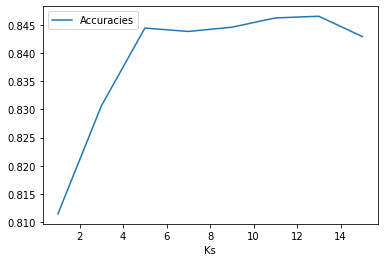

In [ ]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Train/Predict with normalization using k=1,3,...,15
accuracies = []
ks = [1,3,5,7,9,11,13,15]
col_type=['real']*11
col_type[10] = 'cat'

for i in range(1,16,2):
  # Load magic telescope data
  raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_train.arff')
  df_data = pd.DataFrame(raw_data[0])

  np_arr = df_data.to_numpy()
  enc = LabelEncoder()
  scaler = MinMaxScaler()

  X_train = np_arr[:,:-1].astype(float)
  X_train = scaler.fit_transform(X_train)
  y_train = enc.fit_transform(np_arr[:,-1]) 
  # Train on training set
  knn = KNNClassifier(Type='classification',columntype=col_type, weight_type="no_weight")
  knn.fit(X=X_train, y=y_train, k=i)

  raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_test.arff')
  df_data = pd.DataFrame(raw_data[0])
  np_arr = df_data.to_numpy()

  X_test = np_arr[:,:-1].astype(float)
  X_test = scaler.transform(X_test)
  y_test = enc.fit_transform(np_arr[:,-1])

  accuracies.append(knn.score(X=X_test,y=y_test))

dictionary = {'Ks': ks, "Accuracies": accuracies}
df = pd.DataFrame(dictionary)

# Graph classification accuracy over k
df.plot(x ='Ks', y='Accuracies', kind = 'line')

# For the rest of the experiments use only normalized data

## 3. (10%) Use the regression variation of your algorithm (without distance weighting) for the [housing price prediction](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) problem.

- Use this [housing training set](https://byu.instructure.com/courses/14142/files?preview=4660994) and this [housing test set](https://byu.instructure.com/courses/14142/files?preview=4660995).
- Use Mean Square Error (MSE) on the test set as your accuracy metric for this case.
    - Do not normalize regression output values
- Graph MSE on the test set with odd values of k from 1 to 15


best mse @ k = 5:  15.89698039215686


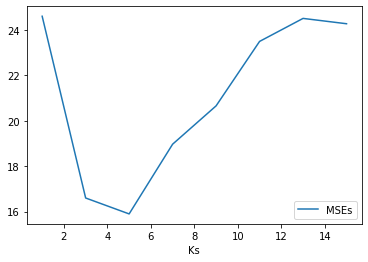

In [37]:
# Graph MSE over k

from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Train/Predict with normalization using k=1,3,...,15
MSEs = []
ks = [1,3,5,7,9,11,13,15]

# Load housing price prediction data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/housing_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
scaler = MinMaxScaler()

X_train = np_arr[:,:-1].astype(float)
X_train = scaler.fit_transform(X_train)
y_train = np_arr[:,-1]

raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/housing_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()

X_test = np_arr[:,:-1].astype(float)
X_test = scaler.transform(X_test)
y_test = np_arr[:,-1]
col_type = ['real']*14
col_type[3] = 'cat'

for i in range(1,16,2):

  # Train on training set
  knn = KNNClassifier(Type='classification',columntype=col_type, weight_type="no_weight")
  knn.fit(X=X_train, y=y_train, k=i)

  MSEs.append(knn.score_mse(X=X_test,y=y_test))

dictionary = {'Ks': ks, "MSEs": MSEs}
df = pd.DataFrame(dictionary)

knn = KNNClassifier(Type='classification',columntype=col_type, weight_type="no_weight")
knn.fit(X=X_train, y=y_train, k=5)
print('best mse @ k = 5: ', knn.score_mse(X_test,y_test))
# Graph classification accuracy over k
df.plot(x ='Ks', y='MSEs', kind = 'line')

## 4. (15%) Repeat your experiments for magic telescope and housing using distance-weighted (inverse of distance squared) voting and discuss your results.


## 4.1 Magic Telescope Dataset

In [34]:
# Train/Predict magic telescope using distance-weighted voting
# Train/Predict with normalization
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load magic telescope data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
enc = LabelEncoder()
scaler = MinMaxScaler()

col_type=['real']*11
col_type[10] = 'cat'

X_train = np_arr[:,:-1].astype(float)
X_train = scaler.fit_transform(X_train)
y_train = enc.fit_transform(np_arr[:,-1]) # 1D array
# Train on training set
knn_wt = KNNClassifier(Type='classification',columntype=col_type)
knn_wt.fit(X=X_train, y=y_train, k=3)

# Predict on test set
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()

X_test = np_arr[:,:-1].astype(float)
X_test = scaler.transform(X_test)
y_test = enc.fit_transform(np_arr[:,-1])

print('inverse weighting accuracy: ', knn_wt.score(X=X_test,y=y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


inverse weighting accuracy:  0.8310831083108311


## 4.2 Housing Dataset

In [38]:
# Train/Predict with normalization
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load magic telescope data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/housing_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
scaler = MinMaxScaler()
np_arr[:, :-1] = scaler.fit_transform(np_arr[:, :-1])

X_train = np_arr[:,:-1].astype(float)
# X_train = scaler.fit_transform(X_train)
y_train = np_arr[:,-1]

raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/housing_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()
np_arr[:, :-1] = scaler.transform(np_arr[:, :-1])

X_test = np_arr[:,:-1].astype(float)
# X_test = scaler.transform(X_test)
y_test = np_arr[:,-1]

col_type = ['real']*14
col_type[3] = 'cat'
# Train on training set
knn_wt = KNNClassifier(Type='classification',columntype=col_type,weight_type='inverse_distance')
knn_wt.fit(X=X_train, y=y_train, k=5)

# Predict on test set
print('inverse weighting mse: ', knn_wt.score_mse(X=X_test,y=y_test))

inverse weighting mse:  12.119627591906239


*Discuss your results*

for the magic telescope data, using inverse distance weighting improved the accuracy of the prediction by little (from 83.06% to 83.12%). Therefore, for the magic telescope data I don't know if we can say that iverse distance weighting improves accuracy significantly. 

For the housing data, the lowest MSE occured at k = 5 with the mse = 15.89. Inverse distance weighting for this housing data did seem to have a significant impact on the accuracy, with the MSE at k = 5 being 12.12 < 15.89.

## 5. (10%) Use the k-nearest neighbor algorithm to solve the [credit-approval](https://archive.ics.uci.edu/ml/datasets/Credit+Approval) (credit-a) problem.

- Use this [credit approval dataset](https://byu.instructure.com/courses/14142/files?preview=4660998)
    - Use a 70/30 split of the data for the training/test set
- Note that this set has both continuous and nominal attributes, together with don’t know values. 
- Implement and justify a distance metric which supports continuous, nominal, and don’t know attribute values
    - You need to handle don't knows with the distance metric, not by imputing a value.
    - More information on distance metrics can be found [here](https://www.jair.org/index.php/jair/article/view/10182/24168).
- Use your own choice for k.
- As a rough sanity check, typical knn accuracies for the credit data set are 70-80%.


In [39]:
import random
def getSplit(arr,dec):
  """
  the 'arr' arguement should be the full numpy array before it is split into X and y
  """
  # THE NAMES OF THESE VARIABLES ARE AS IF THE SPLIT IS 80/20 BUT IT WORKS FOR ANY PERCENT BASED ON DEC (which is a decimal value)
  rand_start_index = random.randint(0,arr.shape[0]-1)
  num_vals_80 = round((arr.shape[0])*dec)
  num_vals_20 = arr.shape[0] - num_vals_80
  arr_80_combined = None
  arr_20 = None
  if (rand_start_index + num_vals_80) >= arr.shape[0]: # if the starting index (row) + the number of rows we need to make 80% of the rows >= the number of rows in arr
    num_vals_from_start = (rand_start_index + num_vals_80) - arr.shape[0] - 1 # the number of rows past the last row (back to the first row) that we need to make 80%
    arr_80_pt1 = arr[:num_vals_from_start,:] # part1 of the 80%_array from row[0] to row[num_vals_from_start - 1]
    arr_80_pt2 = arr[rand_start_index:,:] # part2 of the 80%_array from the rand_start_index (row) to the last index (row)
    arr_80_combined = np.concatenate((arr_80_pt1,arr_80_pt2), axis=0)
    arr_20 = arr[num_vals_from_start:rand_start_index,:] # 20%_array is everything in between
  else:
    arr_80_combined = arr[rand_start_index:num_vals_80,:]
    arr_20 = arr[num_vals_80:,:]
  return arr_80_combined, arr_20

In [79]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Load dataset and split into train/test sets
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/credit_approval.arff')
creditDF = pd.DataFrame(raw_data[0])

cont_features = np.where(creditDF.dtypes == 'float64')[0]
cat_features = np.where(creditDF.dtypes != 'float64')[0]
creditDF.iloc[:, cont_features] = MinMaxScaler().fit_transform(creditDF.iloc[:, cont_features])


np_arr = creditDF.to_numpy()

# print(np_arr)

enc = OrdinalEncoder()
np_arr = enc.fit_transform(np_arr[:,cat_features])

train, test = getSplit(np_arr,.7)

X_train = train[:,:-1]
y_train = train[:,-1].astype(int)
X_test = test[:,:-1]
y_test = test[:,-1].astype(int)

col_type = ['cat','real','real','cat','cat','cat','cat','real','cat','cat','real','cat','cat','real','real','cat']
# Train/Predict with normalization
knn_wt = KNNClassifier(Type='classification',columntype=col_type,weight_type='inverse_distance')
knn_wt.fit(X=X_train, y=y_train, k=7)

# Train/Predict credit-approval
print('inverse weighting accuracy: ', knn_wt.score(X=X_test,y=y_test))

inverse weighting accuracy:  0.782608695652174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


*Explain and justify your distance metric*

as a distance metric, I choose for continuous data to use euclidean distance; for nominal data I choose to return distance=1 if the attributes are different or if there is missing data; if the nominal data attribute in the training set equals the attribute in the test instance then distance = 0. The justification for using euclidean distance for continuous data is that is what we were instructed to do. This method for computing nominal distances was chosen because it is the method that we discussed in class, and because it normalizes the difference between nominal data by giving a distance of 1 between different attributes and a distance of 0 between similar attributes. 

## 6. (15%) Use the scikit's KNN Classifier on magic telescope and KNN Regressor on housing and compare your results.

- Try out different hyperparameters to see how well you can do. 


In [22]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Train/Predict magic telescope using scikit's KNN
  # load the data and preprocess
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
enc = LabelEncoder()
scaler = MinMaxScaler()

col_type = ['real']*14
col_type[3] = 'cat'

X_train = np_arr[:,:-1].astype(float)
X_train = scaler.fit_transform(X_train)
y_train = enc.fit_transform(np_arr[:,-1]) 


raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/magic_telescope_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()

X_test = np_arr[:,:-1].astype(float)
X_test = scaler.transform(X_test)
y_test = enc.fit_transform(np_arr[:,-1])

  #initialize the model
knn = KNeighborsClassifier()

  #List Hyperparameters that we want to tune.
# leaf_size = list(range(1,20))
n_neighbors = list(range(1,13))
p=[1,2]
wts=['uniform', 'distance']

  #Convert to dictionary
hyperparameters = dict(weights=wts, n_neighbors=n_neighbors, p=p)
  #Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10)
  #Fit the model
best_model = clf.fit(X_train, y_train)
  #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p']) # p: 1 --> manhattan; p:2 --> euclidean
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors']) # best k
print('Best weights:', best_model.best_estimator_.get_params()['weights']) # distance mean IDW, uniform means no weights

print('accuracy of best model: ',best_model.score(X_test,y_test))

Best p: 1
Best n_neighbors: 12
Best weights: distance
accuracy of best model:  0.8532853285328533


In [30]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
# Train/Predict housing using scikit's KNN
  # load the data and preprocess
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/housing_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()
scaler = MinMaxScaler()
np_arr[:, :-1] = scaler.fit_transform(np_arr[:, :-1])

X_train = np_arr[:,:-1].astype(float)
y_train = np_arr[:,-1]

raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab4_kNN/data/housing_test.arff')
df_data = pd.DataFrame(raw_data[0])
np_arr = df_data.to_numpy()
np_arr[:, :-1] = scaler.transform(np_arr[:, :-1])

X_test = np_arr[:,:-1].astype(float)
y_test = np_arr[:,-1]

col_type = ['real']*14
col_type[3] = 'cat'


  #initialize the model
knn_reg = KNeighborsRegressor()

  #List Hyperparameters that we want to tune.
# leaf_size = list(range(1,20))
n_neighbors = list(range(1,20))
p=[1,2]
wts=['uniform', 'distance']

  #Convert to dictionary
hyperparameters = dict(weights=wts, n_neighbors=n_neighbors, p=p)
  #Use GridSearch
clf = GridSearchCV(knn_reg, hyperparameters, cv=10)
  #Fit the model
best_model = clf.fit(X_train, y_train)
  #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p']) # p: 1 --> manhattan; p:2 --> euclidean
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors']) # best k
print('Best weights:', best_model.best_estimator_.get_params()['weights']) # distance mean IDW, uniform means no weights

print('accuracy of best model: ',best_model.score(X_test,y_test))
# for the gridsearch and printing I used code from here https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

Best p: 1
Best n_neighbors: 4
Best weights: distance
accuracy of best model:  0.8595764828109167


*Report your comparison*

For the KNN Classifier on the magic telescope data, I used a grid search to find the best hyperparameters of weight type (idw, uniform), distance type (p: manhattan, euclidean), and number of neighbors (k). It was found that for the magic telescope data with the KNNClassifier that the best distance type (p:1) for the model was manhattan distance, with k=12 neighbors, and inverse distance weighting. 

For the housing data I also used grid search to find the best hyperparameters which were also weight type (idw, uniform), distance type (p: manhattan, euclidean), and number of neighbors (k). For the housing data, the best model also used manhattan distance (p:1), k=4 nearest neighbors, and inverse distance weighting as well.

I'll note that the KNNRegressor model on the housing data ran much quicker than the KNNClassifier did. The reason is probably that the classification has more computation steps than the regression does.

## 7. (optional 5% extra credit): For the best value of k for any one of the datasets, implement a reduction algorithm that removes data points in some rational way such that performance does not drop too drastically on the test set given the reduced training set.

- Compare your performance on the test set for the reduced and non-reduced versions and give the number (and percentage) of training examples removed from the original training set. How well does your reduction algorithm work?
    - Note that performance for magic telescope is classification accuracy and for housing it is mean squared error.
    - Magic Telescope has about 12,000 instances and if you use a leave one out style of testing for your data set reduction, then your algorithm will run slow since that is n2 at each step.
    - If you wish, you may use a random subset of 2,000 of the magic telescope instances.
    - Examples of reduction techniques include: (a) leave-one-out reduction - Drop instance if it would still be classified correctly, (b) growth algorithm - Only add instance if it is not already classified correctly, (c) just keep central points, (d) just keep border points, etc. (see Wilson, D. R. and Martinez, T. R., Reduction Techniques for Exemplar-Based Learning Algorithms, Machine Learning Journal, vol. 38, no. 3, pp. 257-286, 2000).